In [1]:
import numpy as np

In [66]:
def step_function(y, threshold=0.5):
    return  np.where(y >= threshold, 1, 0)

In [67]:

class Perceptron:
    
    def __init__(self, activation_func, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.activation_func = activation_func
        self.weights = [] 
        self.bias = None
    
    def fit(self, X, y):
        
        observations, features = X.shape
        
        self.weights = np.random.rand(features)
        self.bias = 0
        
        for i in range(self.num_iterations):
            for xi, yi in zip(X,y):
                
                y_pred = self.predict(xi)
                
                da = 2 * (yi - y_pred) * xi
                db = 2 * (yi - y_pred)
                
                self.weights = self.weights + self.learning_rate * da
                self.bias = self.bias + self.learning_rate * db

    def predict(self, X):
        y = np.dot(X, self.weights) + self.bias 
        y_pred = self.activation_func(y)
        return y_pred
    

In [68]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

p = Perceptron(learning_rate=0.01, num_iterations=1000, activation_func=step_function)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)



Perceptron classification accuracy 1.0
Confusion Matrix:
[[14  0]
 [ 0 16]]


Text(0.5, 1.0, 'Decision Regions for Perceptron')

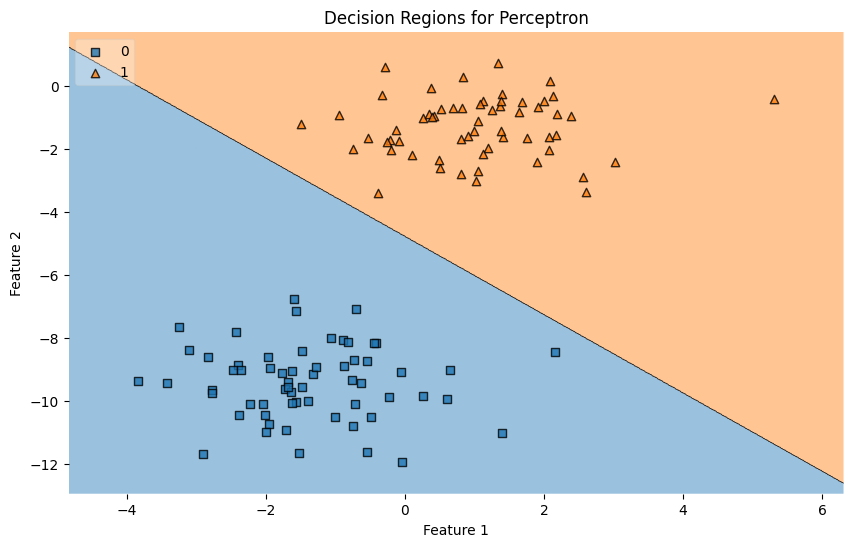

In [69]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, clf=p, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions for Perceptron')